# importing necessary libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,\
recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,f1_score,\
classification_report

# Loading dataset

In [37]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)


In [38]:
df = data.frame

# Splitting dataset for training and testing and scaling data

In [39]:
X = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.2)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Multiple SVM models

In [40]:
models = {
    "linear_svm":SVC(kernel='linear'),
    "rbf_svm": SVC(kernel='rbf'),
    'sigmoid':SVC(kernel='sigmoid'),
    "poly_degree2":SVC(kernel='poly',degree=2),
    "poly_degree3":SVC(kernel='poly',degree=3)
}

In [41]:
training_score = []
testing_score = []
precision = []
recall  = []
f1 = []
support_vectors = []
model_name = []
for name , model in models.items():
  models[name].fit(x_train_scaled,y_train)
  train_pred = model.predict(x_train_scaled)
  test_pred = model.predict(x_test_scaled)
  tr_acc = accuracy_score(y_train,train_pred)
  te_acc = accuracy_score(y_test,test_pred)
  training_score.append(tr_acc)
  testing_score.append(te_acc)
  te_precision = precision_score(y_test,test_pred)
  precision.append(te_precision)
  te_recall = recall_score(y_test,test_pred)
  recall.append(te_recall)
  te_f1 = f1_score(y_test,test_pred)
  f1.append(te_f1)
  support_vectors.append(model.n_support_)
  model_name.append(name)


In [42]:
results_df = pd.DataFrame([model_name,training_score,testing_score,
                           precision,recall,f1,support_vectors]).T
results_df

,0,1,2,3,4,5,6
0,linear_svm,0.984615,0.982456,0.986111,0.986111,0.986111,"[16, 20]"
1,rbf_svm,0.984615,0.982456,0.986111,0.986111,0.986111,"[53, 52]"
2,sigmoid,0.956044,0.95614,0.958904,0.972222,0.965517,"[35, 36]"
3,poly_degree2,0.83956,0.815789,0.793103,0.958333,0.867925,"[124, 126]"
4,poly_degree3,0.912088,0.929825,0.9,1.0,0.947368,"[75, 75]"


In [43]:
cols = ["model name",'training score','testing score','precision score','recall score','f1 score','support vectors']
results_df.columns = cols

In [44]:
results_df

,model name,training score,testing score,precision score,recall score,f1 score,support vectors
0,linear_svm,0.984615,0.982456,0.986111,0.986111,0.986111,"[16, 20]"
1,rbf_svm,0.984615,0.982456,0.986111,0.986111,0.986111,"[53, 52]"
2,sigmoid,0.956044,0.95614,0.958904,0.972222,0.965517,"[35, 36]"
3,poly_degree2,0.83956,0.815789,0.793103,0.958333,0.867925,"[124, 126]"
4,poly_degree3,0.912088,0.929825,0.9,1.0,0.947368,"[75, 75]"


In [45]:
results_df["Toal support vectors"] = results_df['support vectors'].apply(sum)

In [46]:
results_df

,model name,training score,testing score,precision score,recall score,f1 score,support vectors,Toal support vectors
0,linear_svm,0.984615,0.982456,0.986111,0.986111,0.986111,"[16, 20]",36
1,rbf_svm,0.984615,0.982456,0.986111,0.986111,0.986111,"[53, 52]",105
2,sigmoid,0.956044,0.95614,0.958904,0.972222,0.965517,"[35, 36]",71
3,poly_degree2,0.83956,0.815789,0.793103,0.958333,0.867925,"[124, 126]",250
4,poly_degree3,0.912088,0.929825,0.9,1.0,0.947368,"[75, 75]",150


# Grid Search for svm with rbf kernel

In [47]:
svm = SVC()
parameters = {
    "kernel":["rbf"],
    "C":[0.001,0.01,0.1,1,10,1000],
    "gamma":["auto","scale"]
}

In [48]:
grid = GridSearchCV(svm,param_grid=parameters,cv=5,scoring="accuracy")
grid.fit(x_train_scaled,y_train)
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000],
                         'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
             scoring='accuracy')

In [49]:
grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [50]:
scores = pd.DataFrame(grid.cv_results_)

In [52]:
score_df = scores[["params","mean_test_score"]]
score_df

,params,mean_test_score
0,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}",0.626374
1,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}",0.626374
2,"{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}",0.626374
3,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.626374
4,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.945055
5,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.945055
6,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.978022
7,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.978022
8,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.969231
9,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.969231


In [53]:
best_parameters = score_df.sort_values(by="mean_test_score",ascending=False)
best_parameters

,params,mean_test_score
6,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.978022
7,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.978022
8,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.969231
9,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.969231
11,"{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}",0.962637
10,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}",0.960440
4,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.945055
5,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.945055
3,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.626374
2,"{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}",0.626374


In [54]:
results_df

,model name,training score,testing score,precision score,recall score,f1 score,support vectors,Toal support vectors
0,linear_svm,0.984615,0.982456,0.986111,0.986111,0.986111,"[16, 20]",36
1,rbf_svm,0.984615,0.982456,0.986111,0.986111,0.986111,"[53, 52]",105
2,sigmoid,0.956044,0.95614,0.958904,0.972222,0.965517,"[35, 36]",71
3,poly_degree2,0.83956,0.815789,0.793103,0.958333,0.867925,"[124, 126]",250
4,poly_degree3,0.912088,0.929825,0.9,1.0,0.947368,"[75, 75]",150


# Bar graph for testing score of different models

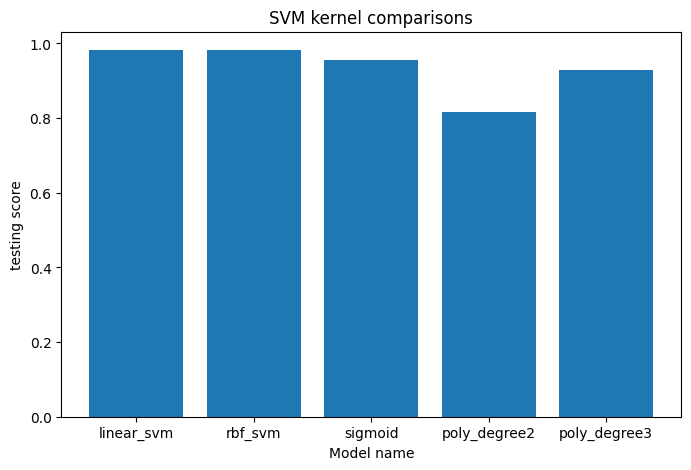

In [58]:
plt.figure(figsize=(8,5))
plt.bar(results_df["model name"],results_df["testing score"])
plt.xlabel("Model name")
plt.ylabel("testing score")
plt.title("SVM kernel comparisons")
plt.show()

# 2D projection visualization

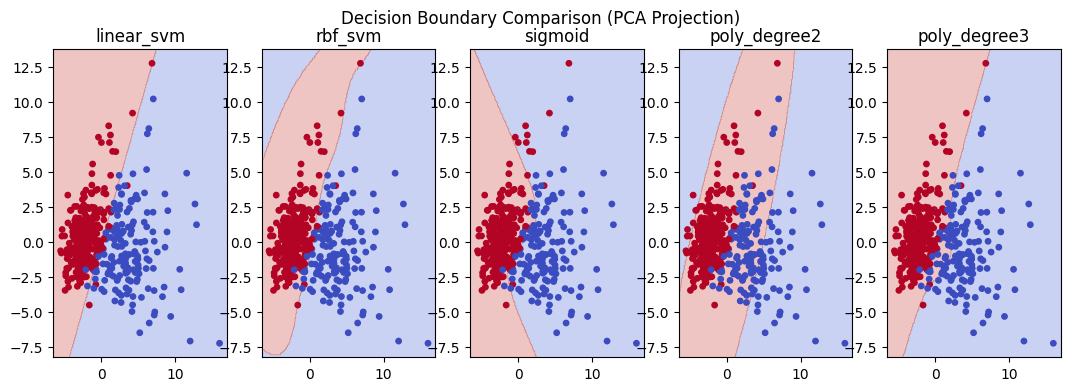

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train_scaled)

plt.figure(figsize=(13,4))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_pca, y_train)

    xx, yy = np.meshgrid(
        np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 200),
        np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 200)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1,5,i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap="coolwarm", s=15)
    plt.title(name)

plt.suptitle("Decision Boundary Comparison (PCA Projection)")
plt.show()
